<a href="https://colab.research.google.com/github/anujushir/My-Projects-ML-DL-and-NLP-/blob/main/Incident_Management_Backlog_Breakdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Tickets: 237
Tickets by Priority:
 Priority
LOW       153
Low        48
Normal     25
NORMAL     10
HIGH        1
Name: count, dtype: int64
Tickets by Status:
 Status
Pending             131
On Hold              60
Open                 25
In Queue              8
Work in Progress      8
In Progress           5
Name: count, dtype: int64
Tickets by Age Bracket:
 Age Bracket
0-2        109
Over 10     84
6-10        33
3-5         11
Name: count, dtype: int64
Top 10 Most Frequent Problem Clusters:
Most Occurred Problems
2    102
1     47
5     22
4     17
8     14
7     11
3      9
0      8
9      4
6      3
Name: count, dtype: int64
Top Words for Each Cluster:
Cluster 0: desktop, bau, refresh, wgbr, automate, power, facing, factory, fassa, fois
Cluster 1: bau, refresh, fdv, fois, focus, fixe, finish, file, feb, fastloader
Cluster 2: refresh, bau, pc, printer, keyboard, need, wipe, working, request, mouse
Cluster 3: device, phone, new, replacement, work, set, request, maxence, picard

<ipython-input-11-2f5e2a8b8ca0>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['Country'], order=df['Country'].value_counts().index, palette=brown_palette)
<ipython-input-11-2f5e2a8b8ca0>:58: UserWarning: 
The palette list has fewer values (6) than needed (17) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(y=df['Country'], order=df['Country'].value_counts().index, palette=brown_palette)


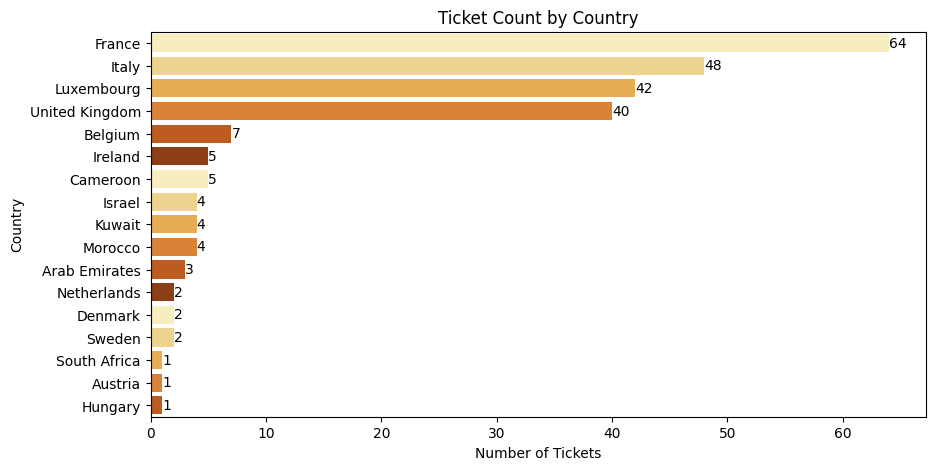

<ipython-input-11-2f5e2a8b8ca0>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['Current Responsible Workgroup'], order=df['Current Responsible Workgroup'].value_counts().index[:10], palette=brown_palette)
<ipython-input-11-2f5e2a8b8ca0>:68: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(y=df['Current Responsible Workgroup'], order=df['Current Responsible Workgroup'].value_counts().index[:10], palette=brown_palette)


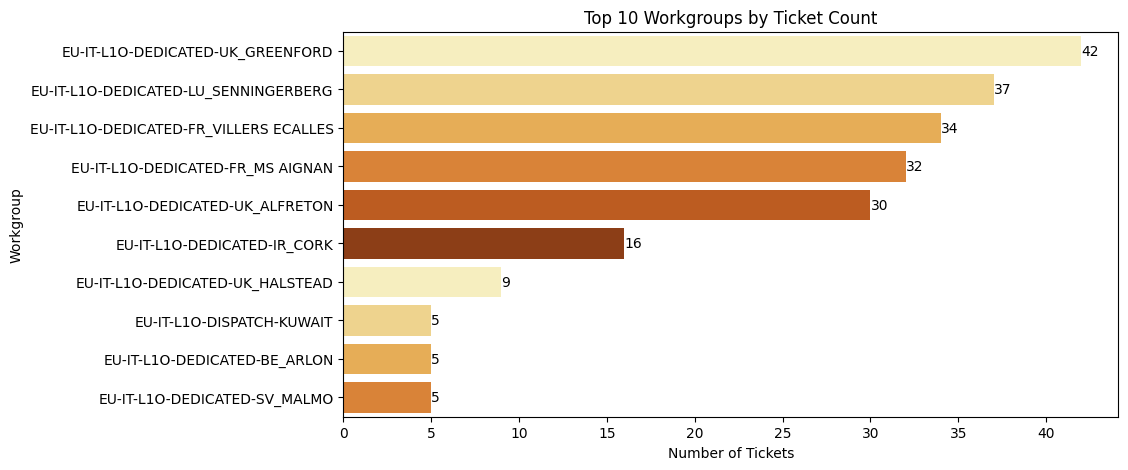

<ipython-input-11-2f5e2a8b8ca0>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette=brown_palette)
<ipython-input-11-2f5e2a8b8ca0>:78: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette=brown_palette)


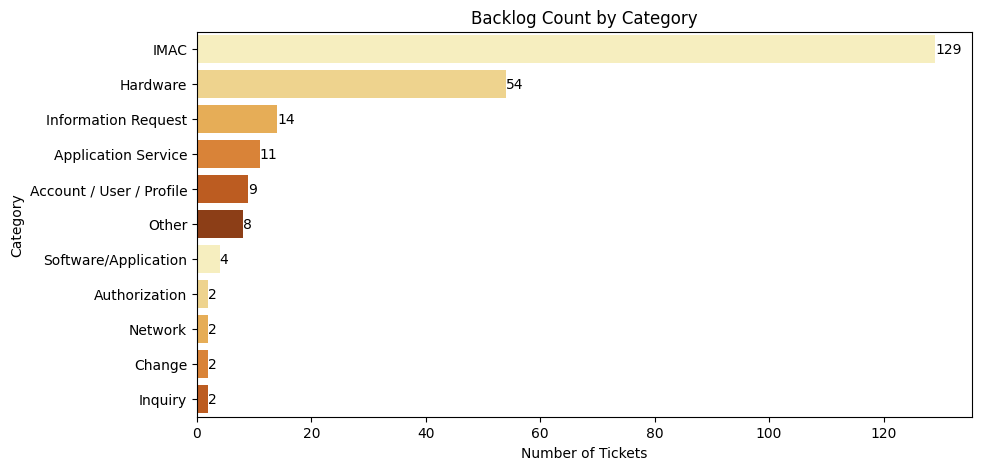

<ipython-input-11-2f5e2a8b8ca0>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['Age Bracket'], order=df['Age Bracket'].value_counts().index, palette=brown_palette)
<ipython-input-11-2f5e2a8b8ca0>:88: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.countplot(y=df['Age Bracket'], order=df['Age Bracket'].value_counts().index, palette=brown_palette)


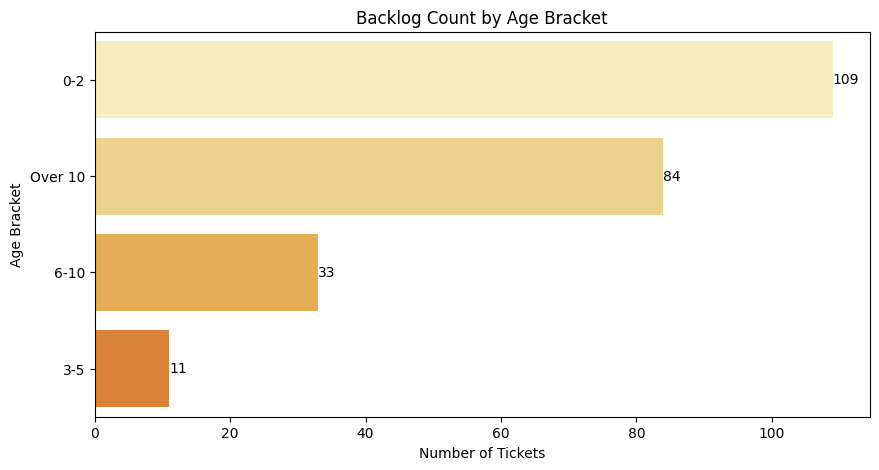

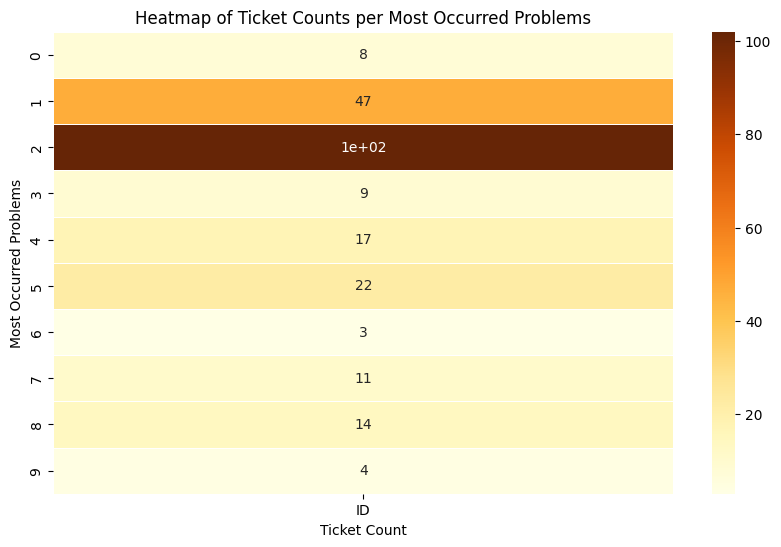

In [11]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = "/content/OSS_DATA.xlsx"  # Updated file path
df = pd.read_excel(file_path, sheet_name="Sheet1")

# General insights
print("Total Tickets:", df.shape[0])
print("Tickets by Priority:\n", df["Priority"].value_counts())
print("Tickets by Status:\n", df["Status"].value_counts())
print("Tickets by Age Bracket:\n", df["Age Bracket"].value_counts())

# Most Repetitive Problems in Short Descriptions
descriptions = df["Description"].dropna().str.lower().str.replace(r'[^a-zA-Z ]', '', regex=True)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(descriptions)

# Apply KMeans clustering
num_clusters = 10  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Add cluster labels to the dataframe
df["Most Occurred Problems"] = kmeans.labels_

# Display the most frequent clusters
cluster_counts = df["Most Occurred Problems"].value_counts().sort_values(ascending=False)
print("Top 10 Most Frequent Problem Clusters:")
print(cluster_counts.head(10))

# Extract top words for each cluster
def get_top_keywords(X, kmeans, vectorizer, n_terms=10):
    words = vectorizer.get_feature_names_out()
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = [words[ind] for ind in order_centroids[i, :n_terms]]
    return cluster_keywords

cluster_keywords = get_top_keywords(X, kmeans, vectorizer)
print("Top Words for Each Cluster:")
for cluster, words in cluster_keywords.items():
    print(f"Cluster {cluster}: {', '.join(words)}")

# Define brown color palette
brown_palette = sns.color_palette("YlOrBr")

# Ticket distribution by country
plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df['Country'], order=df['Country'].value_counts().index, palette=brown_palette)
plt.title("Ticket Count by Country")
plt.xlabel("Number of Tickets")
plt.ylabel("Country")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Ticket distribution by workgroup
plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df['Current Responsible Workgroup'], order=df['Current Responsible Workgroup'].value_counts().index[:10], palette=brown_palette)
plt.title("Top 10 Workgroups by Ticket Count")
plt.xlabel("Number of Tickets")
plt.ylabel("Workgroup")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Breakdown of Backlog Count by Category
plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette=brown_palette)
plt.title("Backlog Count by Category")
plt.xlabel("Number of Tickets")
plt.ylabel("Category")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Breakdown of Backlog Count by Age Bracket
plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df['Age Bracket'], order=df['Age Bracket'].value_counts().index, palette=brown_palette)
plt.title("Backlog Count by Age Bracket")
plt.xlabel("Number of Tickets")
plt.ylabel("Age Bracket")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Heatmap for Cluster-wise Ticket Count
plt.figure(figsize=(10, 6))
cluster_pivot = df.pivot_table(index="Most Occurred Problems", values="ID", aggfunc="count") # Assuming 'ID' represents unique tickets
sns.heatmap(cluster_pivot, annot=True, cmap="YlOrBr", linewidths=0.5)
plt.title("Heatmap of Ticket Counts per Most Occurred Problems")
plt.xlabel("Ticket Count")
plt.ylabel("Most Occurred Problems")
plt.show()
